1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

2. Loading data

In [2]:
df=pd.read_csv(r'C:\Users\ramak\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
df.dtypes
df.shape

(7043, 21)

3. Cleaning the data

In [3]:
# i am doing all column names smaller one
df.columns=df.columns.str.lower()
# checking nulls
df.isnull().sum()
# in total_charges column it should be numeric, but its showing object need to check and see if any empty strings or spaces is t
df['totalcharges'].str.strip()   # removed spaces 
df[df['totalcharges'].str.strip()=='']   # we can see now which values are empty strings
df['totalcharges']=pd.to_numeric(df['totalcharges'],errors='coerce')

In [4]:
# removing the rows because in this tenure=0 ,its not make use when we will keep so
df[df['totalcharges'].isna()].index
df.drop(labels=df[df['totalcharges'].isna()].index,inplace=True)
df[df['totalcharges'].isna()].index

Int64Index([], dtype='int64')

4. EDA

In [5]:
#churn distribution ( overall churn rate )
df['churn'].value_counts(normalize=True).round(2) # from this dataset 27% of customers are churned
# 2 average monthly charge for churned vs non-churned customers
df.groupby('churn')['monthlycharges'].mean()
#3. which service(eg onlinesecurity,techsupport) has highest churn rate
df[df['churn']=='Yes']['onlinesecurity'].value_counts() # onlinesecurity churned rate is more compared to techsupprrt
df[df['churn']=='Yes']['techsupport'].value_counts()

# demographic analysis
# 4.distribution of gender among customers?
df['gender'].value_counts()
#5. What percentage of senior citizens are there?
df['seniorcitizen'].value_counts(normalize=True) # only in this data 16% senior citizens are there

df[df['churn']=='Yes']['gender'].value_counts() # 
df[df['churn']=='Yes']['seniorcitizen'].value_counts(normalize=True) # non-senior citizen churned more than senior citizen

# gender wise churn rate
df.groupby('gender')['churn'].value_counts(normalize=True).unstack()*100
# senior-citizen wise churn rate
df.groupby('seniorcitizen')['churn'].value_counts(normalize=True).unstack()*100

# partner-wise churn rate
df.groupby('partner')['churn'].value_counts(normalize=True).unstack()*100
# dependents wuse churn rate
df.groupby('dependents')['churn'].value_counts(normalize=True).unstack()*100

# distribution of customer tenure
df['tenure'].value_counts().head(10)

# average tenure of churned vs nonchurned customers
df.groupby('tenure')['churn'].value_counts(normalize=True).head(6) # tenure wise churn rate
df.groupby('churn')['tenure'].mean() 

# service usage analysis
#How many customers have phone service, internet service, or multiple lines?
df['phoneservice'].value_counts() # yes=6352, no=680
df['internetservice'].value_counts()
df.groupby('internetservice')['churn'].value_counts(normalize=True)

# How does churn rate vary by service usage (e.g., online security, tech support, streaming TV)?
# from this i will get do customers without onlinesecurity churn more
features=['onlinesecurity','techsupport','streamingtv']
for feature in features:
    print(f'\nfeature is :{feature}')
    cat_df=df.groupby(feature)['churn'].value_counts(normalize=True).unstack().round(2)
    print(cat_df)



feature is :onlinesecurity
churn                  No   Yes
onlinesecurity                 
No                   0.58  0.42
No internet service  0.93  0.07
Yes                  0.85  0.15

feature is :techsupport
churn                  No   Yes
techsupport                    
No                   0.58  0.42
No internet service  0.93  0.07
Yes                  0.85  0.15

feature is :streamingtv
churn                  No   Yes
streamingtv                    
No                   0.66  0.34
No internet service  0.93  0.07
Yes                  0.70  0.30


In [6]:
# contract and payment
# What are the proportions of contract types (month-to-month, one year, two year)?
df['contract'].value_counts()

# how does churn rate differ by contract type
df.groupby('contract')['churn'].value_counts(normalize=True).round(2).unstack()['Yes']*100

contract
Month-to-month    43.0
One year          11.0
Two year           3.0
Name: Yes, dtype: float64

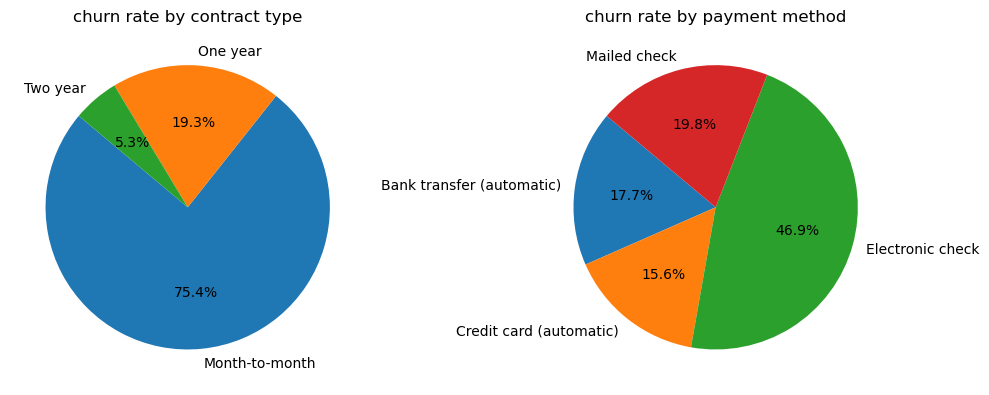

In [7]:
# creating a chart of contract and payment methods:
# calculating the churn rate by contract type
churn_rate_by_contract=df.groupby('contract')['churn'].value_counts(normalize=True).round(2).unstack()['Yes']*100
churn_rate_by_contract

# calculating the churn rate by payment method
churn_rate_by_payment=df.groupby('paymentmethod')['churn'].value_counts(normalize=True).round(2).unstack()['Yes']*100
churn_rate_by_payment

# plot
fig,axs=plt.subplots(1,2,figsize=(10,5))
# pie chart for churn rate by contract type
axs[0].pie(churn_rate_by_contract,labels=churn_rate_by_contract.index,autopct='%1.1f%%',startangle=140)
axs[0].set_title('churn rate by contract type')

# pie chart for churn rate by paymentmethod
axs[1].pie(churn_rate_by_payment,labels=churn_rate_by_payment.index,autopct='%1.1f%%',startangle=140)
axs[1].set_title('churn rate by payment method')

plt.tight_layout()
plt.show()



# this below is for making one pie chart

#plt.figure(figsize=(4,5))
#plt.pie(churn_rate_by_contract,labels=churn_rate_by_contract.index,autopct='%1.1f%%',startangle=140)
#plt.title('churn rate by contract type')
#plt.axis('equal')
#plt.show()


In [8]:
# how does churn rate differ by payment method?
df.groupby('paymentmethod')['churn'].value_counts(normalize=True).round(2).unstack()['Yes']*100
# What payment methods are most popular, and how do they relate to churn?
# electronic check has higher churn rate(nearly half of these customers leave, this indicate poor exp and lack of automation)
df.groupby('paymentmethod')['churn'].value_counts(normalize=True).round(2).unstack()*100

churn,No,Yes
paymentmethod,,
Bank transfer (automatic),83.0,17.0
Credit card (automatic),85.0,15.0
Electronic check,55.0,45.0
Mailed check,81.0,19.0


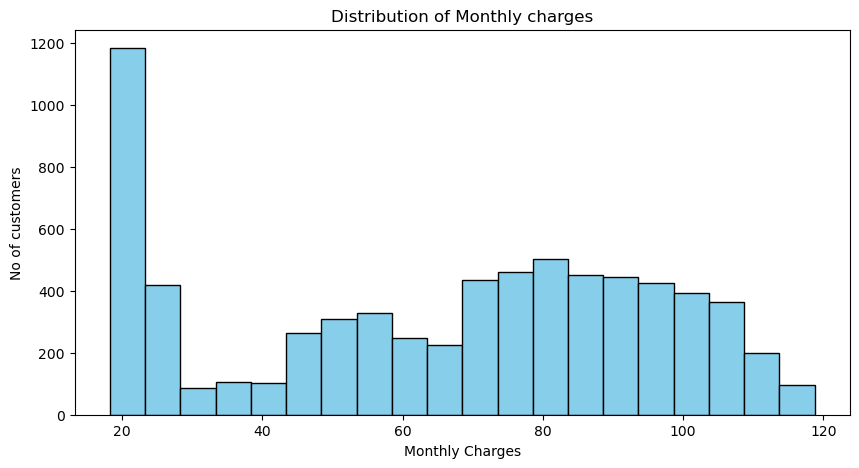

In [9]:
# Charges Analysis
# 1. Distribution of Monthly Charges
#plotting histogram of monthlycharges
plt.figure(figsize=(10,5))
plt.hist(df['monthlycharges'],bins=20,edgecolor='black',color='skyblue')

# adding labels and title
plt.title('Distribution of Monthly charges')
plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.show()

# showing peak at lower charges, this means a large number of customers are paying btwn 18 to 25 monthly charges,and then
# after steady spread btwn 40 and 100,this shows there are significant users on mid-range and premium plans as well, and
# and very few customers are paying more than 110 per month.


Q. Are customers with higher monthly charges more likely to churn?
yes,customers with higher monthly charges more likely to churn, as we can also see the median monthly charge is higher for churned customers,this suggests that the customer paying more may feel its not worth,may be he dissatisfied with premium services.

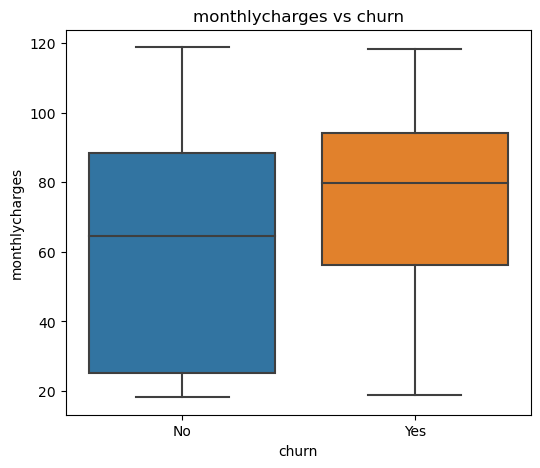

In [10]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.boxplot(x='churn',y='monthlycharges',data=df)
plt.title('monthlycharges vs churn')
plt.show()

Q. now distribution of totalcharges
As we can see from the histogram that majority of the customers are in low total-charges 0 to 2000, and very few customers has
high total charges 6k+ due to long-term users.

(array([1881.,  828.,  687.,  541.,  368.,  303.,  263.,  245.,  223.,
         231.,  205.,  207.,  194.,  201.,  163.,  147.,  127.,   96.,
          83.,   39.]),
 array([  18.8,  452.1,  885.4, 1318.7, 1752. , 2185.3, 2618.6, 3051.9,
        3485.2, 3918.5, 4351.8, 4785.1, 5218.4, 5651.7, 6085. , 6518.3,
        6951.6, 7384.9, 7818.2, 8251.5, 8684.8]),
 <BarContainer object of 20 artists>)

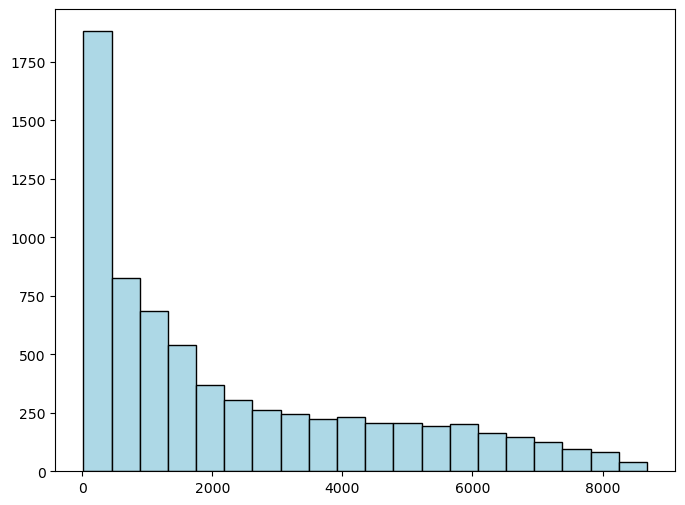

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df['totalcharges'],bins=20,edgecolor='black',color='lightblue')

Text(0.5, 1.0, 'totalcharges vs churn')

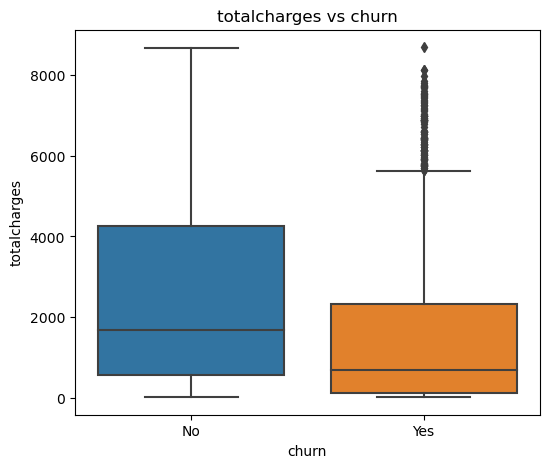

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='churn',y='totalcharges')
plt.title('totalcharges vs churn')
# this suggests that lower totalcharges-->higher churn probability, this likely means that many customers who churn were
# relatively new, also long-term customers(with higher total charges) are more loyal and satisfied.

In [13]:
df.groupby('tenure')['churn'].value_counts(normalize=True).head(6)

tenure  churn
1       Yes      0.619902
        No       0.380098
2       Yes      0.516807
        No       0.483193
3       No       0.530000
        Yes      0.470000
Name: churn, dtype: float64

Text(0, 0.5, 'No of customers')

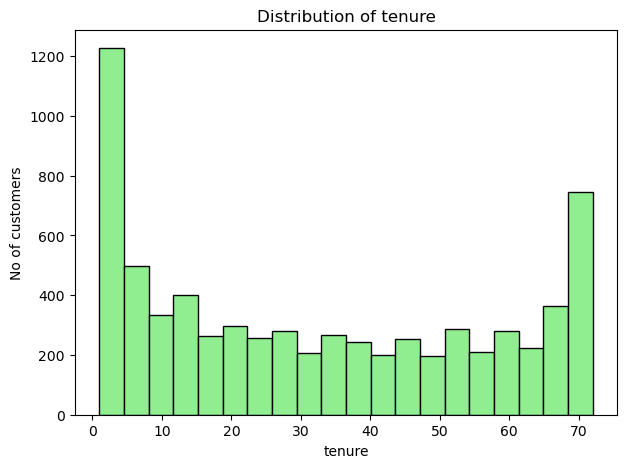

In [14]:
plt.figure(figsize=(7,5))
plt.hist(df['tenure'],bins=20,edgecolor='black',color='lightgreen')
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('No of customers')